<a href="https://colab.research.google.com/github/tngus18/gongboohaeboza/blob/main/05_%ED%9A%8C%EA%B7%80.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 회귀 소개

**대표적인 선형회귀 모델**
1. 릿지(Ridge): 선형회귀에 L2규제를 추가한 회귀모델. L2 규제는 상대적으로 큰 회귀 계수 값의 예측 영향도를 감소시키기 위해서 회귀 계수값을 더 작게 만드는 규제 모델.
2. 라쏘(Lasso): 라쏘 회귀는 선형 회귀에 L1 규제를 적용한 방식. L2 규제가 회귀 계수 값의 크기를 줄이는 데 반해, L1 규제는 예측 영향력이 작은 피처의 회귀 계수를 0으로 만들어 회귀 예측 시 피처가 선택되지 않게 하는 것. L1 규제는 피처 선택 기능으로 불림.
3. 엘라스틱넷(ElasticNet): L1,L2 규제를 함께 결합한 모델. 주로 피처가 많은 데이터 세트에서 적용, L1 규제로 피처의 개수를 줄임과 동시에 L2 규제로 계수 값의 크기를 조정
4. 로지스틱회귀 (Logistic Regression):로지스틱 회귀는 분류에 사용되는 선형 모델. 이진분류뿐만 아니라 희소 영역의 분류, 텍스트 분류에서 뛰어난 예측 성능을 보임.

## 단순 선형 회귀를 통한 회귀 이해

## 비용 최소화하기 - 경사 하강법(Gradient Descent)소개
- 어떻게 하면 오류가 작아지는 방향으로 W 값을 보정할 수 있을까?

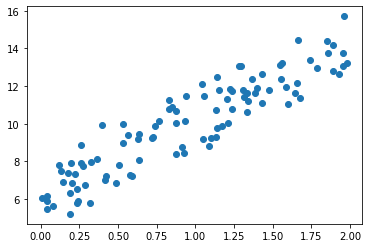

In [49]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(0)
#y=4X+6 을 근사 (w1=4, w0=6). 임의의 값은 노이즈를 위해 만듦.
X = 2*np.random.rand(100,1)
y = 6+ 4*X+np.random.randn(100,1)

#X,y 데이터 세트 산점도로 시각화
plt.scatter(X,y)

In [50]:
# 데이터는 y=4X+6을 중심으로 무작위로 퍼져있음. 하강법을 사용해 w1, w0 구해보겠다,
# 경사 하강법을 이용한 단순 선형 회귀는 w1과 w0을 모두 0으로 초기화 한 뒤 특정 횟수만큼 반복하면서 w1, w0 업데이트.

# w1과 w0를 업데이트 할 w1_update, w0_update를 반환
def get_weight_updates(w1, w0, X, y, learning_rate = 0.01):
    N = len(y)
    # 먼저 w1_update, w0_update를 각각 w1, w0의 shape와 동일한 크기를 가진 0값으로 초기화
    w1_update = np.zeros_like(w1)
    w0_update = np.zeros_like(w0)
    #예측 배열 계산하고 예측과 실제 값의 차이 계산
    y_pred = np.dot(X, w1.T) + w0
    diff = y - y_pred

    # w0_update를 dot 행렬 연산으로 구하기 위해 모두 1 값을 가진 행렬 생성
    w0_factors = np.ones((N,1))

    #w1과 w0을 업데이트할 w1_update와 w0_update 계산
    w1_update = -(2/N)*learning_rate*(np.dot(X.T,diff))
    w0_update = -(2/N)*learning_rate*(np.dot(w0_factors.T,diff))

    return w1_update, w0_update

In [51]:
# get_weight_updates()를 경사 하강 방식으로 반복 수행하여 w1, w0을 업데이트하는 함수인 gradient_descent_steps()함수 생성

# 입력 인자 iters로 주어진 횟수만큼 반복적으로 w1과 w0를 업데이트 적용함.
def gradient_descent_steps(X, y, iters=10000):
    # w0과 w1을 모두 0으로 초기화.
    w0 = np.zeros((1,1))
    w1 = np.zeros((1,1))

    # 인자로 주어진 iters만큼 반복적으로 get_weight_updates()호출해 w1, w0 업데이트 수행
    for ind in range(iters):
        w1_update, w0_update = get_weight_updates(w1,w0,X,y,learning_rate=0.1)
        w1 = w1 - w1_update
        w0 = w0-w0_update

    return w1, w0

In [52]:
# gradient_descent_steps()를 호출해 w1, w0, 구해보겠다.
# 예측값과 실제값의 RSS 차이를 계산하는 get_cost()함수 생성. 이를 통해 경사 하강법의 예측 오류 계산
def get_cost(y,y_pred):
    N = len(y)
    cost = np.sum(np.square(y-y_pred))/N
    return cost

w1,w0 = gradient_descent_steps(X,y,iters=1000)
print('w1:{0:.3f} w0:{1:.3f}'.format(w1[0,0],w0[0,0]))
y_pred = w1[0,0]*X +w0
print('Gradient Descent Total Cost:{0:.4f}'.format(get_cost(y,y_pred)))

w1:3.968 w0:6.222
Gradient Descent Total Cost:0.9924


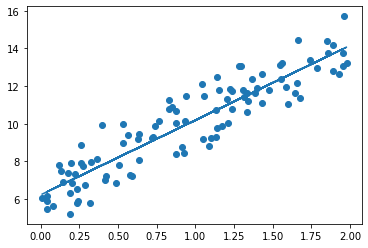

In [53]:
plt.scatter(X,y)
plt.plot(X,y_pred)

In [54]:
# 확률적 경사 하강법 : 전체 입력 데이터로 w가 업데이트되는 값을 계산하는 것이 아니라 일부 데이터만 이용해 w가 업데이트되는 값을 계산.
# 미니 배치 확률적 경사 하강법을 이용해 최적 비용함수를 도출. stochastic_gradient_descent_steps()로 구현, 
# X,y 데이터에서 랜덤하게 batch_size만큼 데이터를 추출해 이를 기반으로 w1_update,  w0_update 계산

def stochastic_gradient_descent_steps(X,y,batch_size=10, iters=1000):
    w0 = np.zeros((1,1))
    w1 = np.zeros((1,1))
    prev_cost = 100000
    iter_index = 0

    for ind in range(iters):
        np.random.seed(ind)
        # 전체 X,y 데이터에서 랜덤하게 batch_size만큼 데이터를 추출해 sample_X, sample_y로 저장
        stochastic_random_index = np.random.permutation(X.shape[0])
        sample_X = X[stochastic_random_index[0:batch_size]]
        sample_y = y[stochastic_random_index[0:batch_size]]

        # 랜덤하게 batch_size만큼 추출된 데이터 기반으로 w1_update, w0_update 계산 후 업데이트
        w1_update, w0_update = get_weight_updates(w1, w0, sample_X, sample_y, learning_rate=0.01)
        w1 = w1 - w1_update
        w0 = w0 - w0_update
    return w1, w0

In [55]:
w1, w0 = stochastic_gradient_descent_steps(X,y,iters=1000)
print('w1:', round(w1[0,0],3), 'w0:', round(w0[0,0],3))
y_pred = w1[0,0]*X+w0
print('Stochastic Gradient Descent Total Cost:{0:.4f}'.format(get_cost(y,y_pred)))

w1: 4.028 w0: 6.156
Stochastic Gradient Descent Total Cost:0.9937


## 사이킷런 LinearRegression을 이용한 보스턴 주택 가격 예측

### LinearRegression 클래스 - Ordinary Least Squares
: 예측값과 실제값의 RSS를 최소화해 OLS추정 방식으로 구현한 클래스.

: fit()메서드로 X,y 배열을 입력 받으면 회귀 계수 인 W를 coef_속성에 저장.

In [56]:
# from locale import normalize
# from sklearn import linear_model
# class sklearn.linear_model.linear_model.LinearRegression(fit_intercept=True, normalize= False, copy_X=True, n_jobs=1)

SyntaxError: ignored

- fit_intercept : 불린 값으로, 디폴트는 True. intercept값을 계산할 것인지 말지를 지정. Flase로 지정하면 intercept가 사용되지 않고 0으로 지정.
- normalize : 불린 값으로 디폴트는 False. fit_intercept가 False인 경우에는 이 파라미터가 무시됨. 만약 True라면 회귀를 수정하기 전에 입력 데이터 세트를 정규화함.
- coef_ : fit()메서드를 수행했을 때 회귀 계수가 배열 형태로 저장하는 속성. Shape는 (Target값 개수, 피처개수)
- intercept_ : intercept 값

### 회귀 평가 지표
- MAE : Mean Absolute Error 실제값과 예측값의 차이를 절댓값으로 변환해 평균한 것.
- MSE : Mean Squared Error 실제값과 예측값의 차이를 제곱해 평균한 것.
- RMSE : MSE값은 오류의 제곱을 구하므로 실제 오류 평균보다 더 커지는 특성이 있어 이것에 루트를 씌운 것.
- R^ : 분산 기반으로 예측 성능 평가.실제 값의 분산 대비 예측값의 분산 비율을 지표로 하며, 1에 가까울수록 예측 정확도가 높음.

### LinearRegression을 이용해 보스턴 주텍 가격 회귀 구현

In [57]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats
from sklearn.datasets import load_boston
%matplotlib inline

# boston 데이터 세트 로드
boston = load_boston()

# boston 데이터 세트 DataFrame 변환
bostonDF = pd.DataFrame(boston.data, columns = boston.feature_names)

# boston 데이터 세트의 target 배열은 주택 가격. 이를 PRICE 칼럼으로 DataFrame에 추가.
bostonDF['PRICE'] = boston.target
print('Boston 데이터 세트 크기:', bostonDF.shape)
bostonDF.head()

Boston 데이터 세트 크기: (506, 14)


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


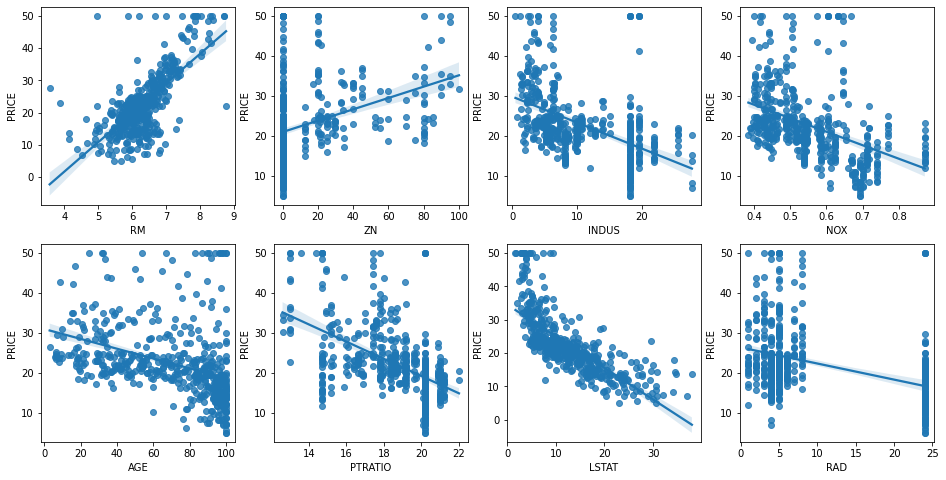

In [58]:
# 2개의 행과 4개의 열을 가진 subplots를 이용. axs는 4*2개의 ax를 가짐.
fig,axs = plt.subplots(figsize=(16,8), ncols=4, nrows=2)
lm_features=['RM','ZN','INDUS','NOX','AGE','PTRATIO','LSTAT','RAD']
for i, feature in enumerate(lm_features):
    row = int(i/4)
    col = i%4

    #시본의 regplot을 이용해 산점도와 선형 회귀 직선을 함께 표현
    sns.regplot(x=feature, y='PRICE', data=bostonDF, ax=axs[row][col])

In [59]:
# 다른 칼럼보다 RM과 PRICE의 영향도가 가장 두드러지게 나타남.

In [60]:
# linearregression 클래스를 ㅣ용해 보스턴 주택 가격의 회귀모델을 만듦.

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

y_target = bostonDF['PRICE']
X_data = bostonDF.drop(['PRICE'], axis=1, inplace=False)

X_train, X_test, y_train, y_test = train_test_split(X_data, y_target, test_size=0.3, random_state=156)

#선형 회귀 OLS로 학습/예측/평가
lr = LinearRegression()
lr.fit(X_train, y_train)
y_preds = lr.predict(X_test)
mse = mean_squared_error(y_test, y_preds)
rmse = np.sqrt(mse)

print('MSE:{0:.3f},RMSE : {1:.3F}'.format(mse,rmse))
print('Variance score : {0:.3f}'.format(r2_score(y_test,y_preds)))

MSE:17.297,RMSE : 4.159
Variance score : 0.757


In [61]:
print('절편 값:', lr.intercept_)
print('회귀 계수값:', np.round(lr.coef_,1))

절편 값: 40.99559517216477
회귀 계수값: [ -0.1   0.1   0.    3.  -19.8   3.4   0.   -1.7   0.4  -0.   -0.9   0.
  -0.6]


In [62]:
# 회귀 계수를 큰 값 순으로 정렬하기 위해 Series로 생성, 인덱스 칼럼명에 유의
coeff = pd.Series(data=np.round(lr.coef_,1), index=X_data.columns)
coeff.sort_values(ascending=False)

RM          3.4
CHAS        3.0
RAD         0.4
ZN          0.1
INDUS       0.0
AGE         0.0
TAX        -0.0
B           0.0
CRIM       -0.1
LSTAT      -0.6
PTRATIO    -0.9
DIS        -1.7
NOX       -19.8
dtype: float64

In [63]:
# 5개의 폴드 세트에서 cross_val_score()을 이용해 교차 검증으로 MSE와 RMSE를 측정.
# 사이킷런은 cross_val_score()dmf 이용, RMSE제공하지 않아 변환해줘야 함.
# 사이킷런의 지표 평가 기준은 높은 지표 값일수록 좋은 모델인데 반해, 일반적으로 회귀는 MSE값이 낮을수록 좋은 회귀 모델.
# scorint = 'neg_mean_squared_error'로 사이킷런의 Scoring함수를 호출하면 모델에서 계산된 MSE값에 -1 곱해서 반환.
# cross_val_score()에서 반환된 값에 다시 -1을 곱해야 양의 값인 원래 모델에서 계산된 MSE값이 됨.

In [64]:

from sklearn.model_selection import cross_val_score

y_target = bostonDF['PRICE']
X_data = bostonDF.drop(['PRICE'],axis =1, inplace=False)
lr = LinearRegression()

# cross_val_score()로 5 폴드드 세트로 MSE를 구한 뒤 이를 기반으로 다시 RMSE구함
neg_mse_scores = cross_val_score(lr, X_data, y_target, scoring='neg_mean_squared_error', cv=5)
rmse_scores = np.sqrt(-1*neg_mse_scores)
avg_rmse = np.mean(rmse_scores)

# cross_val_score(scoring = 'neg_mean_squared_error')로 반환된 값은 모두 음수
print('5 folds의 개별 Negative MSE scores:', np.round(neg_mse_scores,2))
print('5 folds의 개별 RMSE scores:', np.round(rmse_scores,2))
print('5 folds의 평균 RMSE scores: {0:.3f}'.format(avg_rmse))

5 folds의 개별 Negative MSE scores: [-12.46 -26.05 -33.07 -80.76 -33.31]
5 folds의 개별 RMSE scores: [3.53 5.1  5.75 8.99 5.77]
5 folds의 평균 RMSE scores: 5.829


### 다항 회귀와 과(대)적합/과소적합 이해

In [65]:
# PolynomialFeatures를 이용해 단항값[x1,x2]를 다항값으로 [1,x1,x2,x1^,x1x2,x2^]으로 변환하는 예제

from sklearn.preprocessing import PolynomialFeatures
import numpy as np

# 다항식으로 변환한 다항식 생성, [[0,1],[2,3]]의 2X2 행렬 생성
X = np.arange(4).reshape(2,2)
print('일차 단항식계수 피처 : \n', X)

# degree = 2인 2차 다항식으로 변환하기 위해 PolynomialFeatures를 이용해 변환
poly = PolynomialFeatures(degree =2)
poly.fit(X)
poly_ftr = poly.transform(X)
print('변환된 2차 다항식 꼐수 피처: \n', poly_ftr)

일차 단항식계수 피처 : 
 [[0 1]
 [2 3]]
변환된 2차 다항식 꼐수 피처: 
 [[1. 0. 1. 0. 0. 1.]
 [1. 2. 3. 4. 6. 9.]]


In [66]:
def polynomial_fun(X):
    y = 1+2*X+X**2+X**3
    return y
X = np.arange(4).reshape(2,2)
print('일차 단항식 계수값:\n',X)
y = polynomial_fun(X)
print('삼차 다항식 결정값:\n',y)

일차 단항식 계수값:
 [[0 1]
 [2 3]]
삼차 다항식 결정값:
 [[ 1  5]
 [17 43]]


In [67]:
# 3차 다항식 변환
poly_ftr = PolynomialFeatures(degree=3).fit_transform(X)
print('3차 다항식 계수 feature: \n',poly_ftr)

# 선형 회귀에 3차 다항식 계수 피처와 3차 다항식 결정 값으로 학습 후 회귀 계수 확인
model = LinearRegression()
model.fit(poly_ftr,y)

print('Polynomial 회귀 계수\n', np.round(model.coef_,2))
print('Polynomial 회귀 shape :', model.coef_.shape)

3차 다항식 계수 feature: 
 [[ 1.  0.  1.  0.  0.  1.  0.  0.  0.  1.]
 [ 1.  2.  3.  4.  6.  9.  8. 12. 18. 27.]]
Polynomial 회귀 계수
 [[0.   0.02 0.02 0.05 0.07 0.1  0.1  0.14 0.22 0.31]
 [0.   0.06 0.06 0.11 0.17 0.23 0.23 0.34 0.51 0.74]]
Polynomial 회귀 shape : (2, 10)


In [68]:
# 피처 변환과 선형 회귀 적용을 각각 별도로 하는 것보다는 사이킷런의 Pipeline객체를 이용해 한번에 다항 회귀를 구현하는 것이 코드를 더 명료하게 작성하는 방법.
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
import numpy as np

def polynomial_fun(X):
    y = 1+2*X+X**2+X**3
    return y

# Pipeline객체로 간소하게 다항식 피처 변환과 선형 회귀를 연결
model = Pipeline([('poly',PolynomialFeatures(degree=3)), ('linear',LinearRegression())])
X = np.arange(4).reshape(2,2)
y = polynomial_fun(X)

model = model.fit(X,y)
print('Polynomial 회귀계수\n',np.round(model.named_steps['linear'].coef_,2))


Polynomial 회귀계수
 [[0.   0.02 0.02 0.05 0.07 0.1  0.1  0.14 0.22 0.31]
 [0.   0.06 0.06 0.11 0.17 0.23 0.23 0.34 0.51 0.74]]


### 다항 회귀를 이용한 과소적합 및 과적합 이해
- 다항식의 차수가 높아질수록 매우 복잡한 피처 간의 관계까지 모데링이 가능 / 차수를 높일수록 학습 데이터에만 맞춘 학습이 이뤄져서 테스트 데이터 환경에서는 예측 정확도 떨어짐  => 과적합

In [69]:
# 임의의 값으로 구성된 X값에 대해 코사인 변환 값을 반환.
def true_fun(X):
    return np.cos(1.5 * np.pi * X)

# X는 0부터 1까지 30개의 임의의 값을 순서대로 샘플링한 데이터.
np.random.seed(0)
n_samples = 30
X = np.sort(np.random.rand(n_samples))

# y값은 코사인 기반의 true_fun()에서 약간의 노이즈 변동 값을 더한 값.
y = true_fun(X) + np.random.randn(n_samples)*0.1


Degree 1 회귀계수는 [-2.]입니다.
Degree 1 MSE는0.4077289625098685입니다.

Degree 4 회귀계수는 [  0. -18.  24.  -7.]입니다.
Degree 4 MSE는0.04320874987232072입니다.

Degree 15 회귀계수는 [-2.98300000e+03  1.03899000e+05 -1.87415100e+06  2.03715130e+07
 -1.44872551e+08  7.09311979e+08 -2.47064676e+09  6.24558367e+09
 -1.15676035e+10  1.56894317e+10 -1.54005437e+10  1.06456871e+10
 -4.91375763e+09  1.35919168e+09 -1.70380199e+08]입니다.
Degree 15 MSE는180526263.3177066입니다.


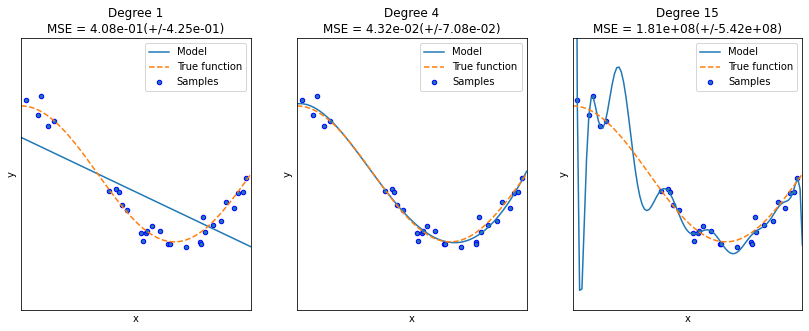

In [70]:
# 임의의 값으로 구성된 X값에 대해 코사인 변환 값을 반환.
def true_fun(X):
    return np.cos(1.5 * np.pi * X)

# X는 0부터 1까지 30개의 임의의 값을 순서대로 샘플링한 데이터.
np.random.seed(0)
n_samples = 30
X = np.sort(np.random.rand(n_samples))

# y값은 코사인 기반의 true_fun()에서 약간의 노이즈 변동 값을 더한 값.
y = true_fun(X) + np.random.randn(n_samples)*0.1

plt.figure(figsize=(14,5))
degrees = [1,4,15]

# 다항 회귀 차수를 1,4,15로 각각 변화시키면서 비교
for i in range(len(degrees)):
    ax = plt.subplot(1, len(degrees), i+1)
    plt.setp(ax, xticks=(), yticks=())

    # 개별 degree별로 Polynomial변환
    polynomial_features = PolynomialFeatures(degree = degrees[i], include_bias=False)
    linear_regression = LinearRegression()
    pipeline = Pipeline([('polynomial_features', polynomial_features),
                         ('linear_regression', linear_regression)])
    pipeline.fit(X.reshape(-1,1),y)

    # 교차 검증으로 다항 회귀를 평가
    scores = cross_val_score(pipeline, X.reshape(-1,1),y, scoring='neg_mean_squared_error', cv=10)

    # Pipeline을 구성하는 세부 객체를 접근하는 named_stpes['객체명']을 이용해 회귀계수 추출
    coefficients = pipeline.named_steps['linear_regression'].coef_
    print('\nDegree {0} 회귀계수는 {1}입니다.'.format(degrees[i], np.round(coefficients),2))
    print('Degree {0} MSE는{1}입니다.'.format(degrees[i], -1*np.mean(scores)))

    # 0부터 1까지 테스트 데이터 세트를 100개로 나눠 예측을 수행합니다,
    # 테스트 데이터 세트에 회귀 예측을 수행하고 예측 곡선과 실제 곡선을 그려서 비교합니다.
    X_test = np.linspace(0,1,100)
    #예측값 곡선
    plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label='Model')
    #실제 값 곡선
    plt.plot(X_test, true_fun(X_test), '--', label='True function')
    plt.scatter(X,y,edgecolor='b', s=20, label='Samples')

    plt.xlabel('x'); plt.ylabel('y'); plt.xlim((0,1)); plt.ylim((-2,2)); plt.legend(loc='best')
    plt.title('Degree {}\nMSE = {:.2e}(+/-{:.2e})'.format(degrees[i], -scores.mean(), scores.std()))

- degree1 : 단순한 직선으로서 단순 선형 회귀와 같음. 실제 데이터 세트인 코사인 데이터 세트를 직선으로 예측하기엔 단순함. 예측 곡선이 학습 데이터의 패턴을 제대로 반영하지 못하고 있는 과소적합 모델이 됨. MSE 값은 0.407
- degree4 : 실제 데이터 세트와 유사한 모습. 변동하는 잡음까지 예측하지는 못했지만, 학습 데이터 세트를 비교적 잘 반영해 코사인 곡선 기반으로 테스트 데이터를 잘 예측한 곡선을 가진 모델. MSE 값은 약 0.043
- degree15 : MSE값이 큰 오류값이 발생. 과적합.학습 데이터에 너무 충실하게 맞춘 과적합이 심한 모델.

### 편향-분산 트레이드오프(Bias-Variance Trade off)

- 머신러닝이 극복해야 할 가장 중요한 이슈 중 하나.
- Degree15 : 고분산
- 편향이 높으면 분산이 낮아지고(과소적합) / 분산이 높으면 편향이 낮아짐(과적합)

## 규제 선형 모델 - 릿지, 라쏘, 엘라스틱넷
### 규제 선형 모델의 개요
- 비용함수는 학습 데이터의 잔차 오류 값을 최소로 하는 RSS 최소화 방법과 과적합을 방지하기 위해 회귀 계수 값이 커지지 않도록 하는 방법이 서로 균형을 이뤄야 함.


### 릿지 회귀
- 주요 생성 파라미터는 alpha
- 릿지 회귀의 alpha L2 규제 계수에 해당.

In [72]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

# alpha = 10으로 설정해 릿지 회귀 수행
ridge = Ridge(alpha=10)
neg_mse_scores = cross_val_score(ridge, X_data, y_target, scoring='neg_mean_squared_error',cv = 5)
rmse_scores = np.sqrt(-1*neg_mse_scores)
avg_rmse = np.mean(rmse_scores)

print(' 5 folds의 개별 Negative MSE scores:', np.round(neg_mse_scores, 3))
print(' 5 folds의 개별 RMSE scores:', np.round(rmse_scores, 3))
print(' 5 folds의 평균 RMSE :{0:.3f}'.format(avg_rmse))

# => 릿지 5개 폴드 세트의 평균 RMSE가 5.524 

 5 folds의 개별 Negative MSE scores: [-11.422 -24.294 -28.144 -74.599 -28.517]
 5 folds의 개별 RMSE scores: [3.38  4.929 5.305 8.637 5.34 ]
 5 folds의 평균 RMSE :5.518


In [74]:
# 릿지의 alpha 값을 0, 0.1, 1, 10, 100으로 변화시키면서 RMSE와 회귀 계수 값의 변화를 살펴 봄.

# 릿지에 사용될 alpha 파라미터의 값을 정의
alphas = [0, 0.1, 1, 10, 100]

# alphas list 값을 반복하면서 alpha에 따른 평균 rmse를 구함.
for alpha in alphas :
    ridge = Ridge(alpha = alpha)

    # cross_val_scare을 이용해 5 폴드의 평균 RMSE를 계산
    neg_mse_scores = cross_val_score(ridge, X_data, y_target, scoring = 'neg_mean_squared_error',cv = 5)
    avg_rmse = np.mean(np.sqrt(-1*neg_mse_scores))
    print('alph {0} 일 때 5 folds의 평균 RMSE : {1:.3f}'.format(alpha, avg_rmse))

alph 0 일 때 5 folds의 평균 RMSE : 5.829
alph 0.1 일 때 5 folds의 평균 RMSE : 5.788
alph 1 일 때 5 folds의 평균 RMSE : 5.653
alph 10 일 때 5 folds의 평균 RMSE : 5.518
alph 100 일 때 5 folds의 평균 RMSE : 5.330


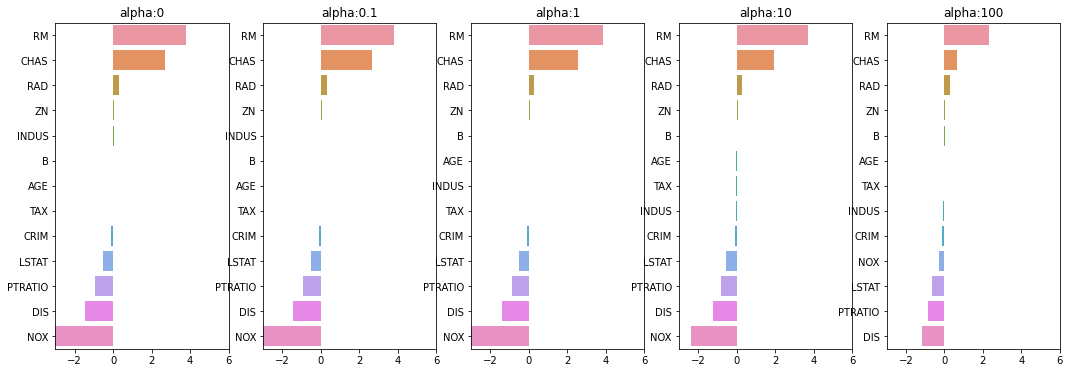

In [75]:
# 각 alpha에 따른 회귀 계수 값을 시각화하기 위해 5개의 열로 돈 맷플롯립 축 생성
fig, axs = plt.subplots(figsize=(18,6),nrows=1, ncols=5)
# 각 alpha 에 따른 회귀 계수 값을 데이터로 저장하기 위한 DataFrame 생성
coeff_df = pd.DataFrame()

# alphas 리스트 값을 차례로 입력해 회귀 계수 값 시각화 및 데이터 저장. pos는 axis의 위치 지정
for pos, alpha in enumerate(alphas):
    ridge = Ridge(alpha = alpha)
    ridge.fit(X_data, y_target)

    #alpha에 따른 피처별로 회귀 계수를 Series로 변환하고 이를 DataFrame의 칼럼으로 추가
    coeff = pd.Series(data=ridge.coef_, index=X_data.columns)
    colname = 'alpha:'+str(alpha)
    coeff_df[colname] = coeff

    # 막대 그래프로 각 alpha 값에서의 회귀계수를 시각화, 회귀 계수값이 높은 순으로 표현
    coeff = coeff.sort_values(ascending=False)
    axs[pos].set_title(colname)
    axs[pos].set_xlim(-3,6)
    sns.barplot(x=coeff.values, y=coeff.index, ax = axs[pos])

# for문 바깥에서 맷플롯립의 show 호출 빛 alpha에 따른 피처별 회귀 계수를 DataFrame으로 표히
plt.show()

In [77]:
ridge_alphas = [0, 0.1, 1, 10, 100]
sort_column = 'alpha:'+str(ridge_alphas[0])
coeff_df.sort_values(by=sort_column, ascending = False)

,alpha:0,alpha:0.1,alpha:1,alpha:10,alpha:100
RM,3.809865,3.818233,3.854000,3.702272,2.334536
CHAS,2.686734,2.670019,2.552393,1.952021,0.638335
RAD,0.306049,0.303515,0.290142,0.279596,0.315358
ZN,0.046420,0.046572,0.047443,0.049579,0.054496
INDUS,0.020559,0.015999,-0.008805,-0.042962,-0.052826
B,0.009312,0.009368,0.009673,0.010037,0.009393
AGE,0.000692,-0.000269,-0.005415,-0.010707,0.001212
TAX,-0.012335,-0.012421,-0.012912,-0.013993,-0.015856
CRIM,-0.108011,-0.107474,-0.104595,-0.101435,-0.102202
LSTAT,-0.524758,-0.525966,-0.533343,-0.559366,-0.660764


### 라쏘 회귀
- W의 절대값에 패널티를 부여하는 L1 규제를 선형 회귀에 적용한 것이 라쏘 회귀
- L2규제가 회귀 계수의 크기를 감소시키는데 반해, L1 규제는 불필요한 회귀 계수를 급격하게 감소시켜 0으로 만들고 제거.

In [103]:
from joblib.externals.cloudpickle import parametrized_type_hint_getinitargs
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Lasso, ElasticNet

# alpha 값에 따른 회귀 모델의 폴드 평균 RMSE를 출력하고 회귀 계수값들을 DataFrame으로 반환
def get_linear_reg_eval(model_name, params = None, X_data_n = None, y_target_n=None, verbose=True, return_coeff=True):
    coeff_df = pd.DataFrame()
    if verbose : print('#######',model_name, '#######')
    for param in params : 
        if model_name == 'Ridge' : model = Ridge(alpha=param)
        elif model_name == 'Lasso' : model = Lasso(alpha = param)
        elif model_name == 'ElasticNet' : model = ElasticNet(alpha=param, l1_ratio=0.7)
        neg_mse_scores = cross_val_score(model, X_data_n, y_target_n, scoring='neg_mean_squared_error', cv = 5)
        avg_rmse = np.mean(np.sqrt(-1*neg_mse_scores))
        print('alpha {0}일 때 5 폴드 세트의 평균 RMSE: {1:.3f}'.format(param, avg_rmse))

        # cross_val_score 는 evaluation metric만 반환하므로 모델을 다시 학습하여 회귀 계수 추출
        model.fit(X_data, y_target)
        # alpha에 따른 피처별 회귀 계수를 Series로 변환하고 이를 DataFrame의 칼럼으로 추가
        coeff = pd.Series(data=model.coef_, index=X_data.columns)
        colname = 'alpha:'+str(param)
        coeff_df[colname] = coeff
    return coeff_df# end of get_linear_regre_eval

In [104]:
# 라쏘에 사용될 alpha 파라미터의 값을 정의하고 get_linear_reg_eval()함수 호출
lasso_alphas = [0.07, 0.1, 0.5, 1, 3]
coeff_lasso_df = get_linear_reg_eval('Lasso', params = lasso_alphas, X_data_n=X_data, y_target_n=y_target)

####### Lasso #######
alpha 0.07일 때 5 폴드 세트의 평균 RMSE: 5.612
alpha 0.1일 때 5 폴드 세트의 평균 RMSE: 5.615
alpha 0.5일 때 5 폴드 세트의 평균 RMSE: 5.669
alpha 1일 때 5 폴드 세트의 평균 RMSE: 5.776
alpha 3일 때 5 폴드 세트의 평균 RMSE: 6.189


In [105]:
# 반환된 coeff_lasso_df를 첫번째 칼럼 순으로 내림차순 정렬해 회귀계수 DataFrame 출력력
# sort_column = 'alpha:'+str(lasso_alphas[0])
# coeff_lasso_df.sort_values(by=sort_column, ascending=False)
sort_column = 'alpha:'+str(lasso_alphas[0])
coeff_lasso_df.sort_values(by=sort_column, ascending=False)


,alpha:0.07,alpha:0.1,alpha:0.5,alpha:1,alpha:3
RM,3.789725,3.703202,2.498212,0.949811,0.000000
CHAS,1.434343,0.955190,0.000000,0.000000,0.000000
RAD,0.270936,0.274707,0.277451,0.264206,0.061864
ZN,0.049059,0.049211,0.049544,0.049165,0.037231
B,0.010248,0.010249,0.009469,0.008247,0.006510
NOX,-0.000000,-0.000000,-0.000000,-0.000000,0.000000
AGE,-0.011706,-0.010037,0.003604,0.020910,0.042495
TAX,-0.014290,-0.014570,-0.015442,-0.015212,-0.008602
INDUS,-0.042120,-0.036619,-0.005253,-0.000000,-0.000000
CRIM,-0.098193,-0.097894,-0.083289,-0.063437,-0.000000


### 엘라스틱넷 회귀

In [107]:
# 엘라스틱넷에 사용될 alpha 파라미터의 값들을 정의하고 get_linear_reg_eval()함수 호출
# l1_ratio 는 0.7로 고정
elastic_alphas = [0.07, 0.1, 0.5, 1, 3]
coeff_elastic_df = get_linear_reg_eval('ElasticNet', params=elastic_alphas, X_data_n=X_data, y_target_n = y_target)

####### ElasticNet #######
alpha 0.07일 때 5 폴드 세트의 평균 RMSE: 5.542
alpha 0.1일 때 5 폴드 세트의 평균 RMSE: 5.526
alpha 0.5일 때 5 폴드 세트의 평균 RMSE: 5.467
alpha 1일 때 5 폴드 세트의 평균 RMSE: 5.597
alpha 3일 때 5 폴드 세트의 평균 RMSE: 6.068


In [108]:
# 반환된 coeff_elastic_df를 첫 번 째 칼럼순으로 내림차순 정렬해 회귀계수 DataFrame 출력
sort_column = 'alpha:'+str(elastic_alphas[0])
coeff_elastic_df.sort_values(by=sort_column, ascending=False)

,alpha:0.07,alpha:0.1,alpha:0.5,alpha:1,alpha:3
RM,3.574162,3.414154,1.918419,0.938789,0.000000
CHAS,1.330724,0.979706,0.000000,0.000000,0.000000
RAD,0.278880,0.283443,0.300761,0.289299,0.146846
ZN,0.050107,0.050617,0.052878,0.052136,0.038268
B,0.010122,0.010067,0.009114,0.008320,0.007020
AGE,-0.010116,-0.008276,0.007760,0.020348,0.043446
TAX,-0.014522,-0.014814,-0.016046,-0.016218,-0.011417
INDUS,-0.044855,-0.042719,-0.023252,-0.000000,-0.000000
CRIM,-0.099468,-0.099213,-0.089070,-0.073577,-0.019058
NOX,-0.175072,-0.000000,-0.000000,-0.000000,-0.000000


### 선형 회귀 모델을 위한 데이터 변환
1. standardScaler 클래스를 이용해 평균이 0, 분산이 1인 표준 정규 분포를 가진 데이터 세트로 변환하거나 MinMaxScaler클래스를 이용해 최솟값이 0이고 최댓값이 1인 값으로 정규화 수행
2. 스케일링/정규화를 수행한 데이터 세트에 다시 다항 특성을 적용하여 변환하는 방법. 보통 1번 방법을 통해 예측 성능에 향상이 없을 경우 이와 같은 방법을 적용
3. 원래 값에 log함수를 적용하면 보다 정규 분포에 가까운 형태로 값이 분포됨. 이러한 변환을 로그변환이라 부름. 실제로 선형 회귀에서는 1,2번 방법보다 로그 변환이 많이 사용됨. 1번 방법의 경우 예측 성능 향상을 크게 기대하기 어려운 경우가 많으며 2번 방법의 경우 피처의 개수가 매우 많을 경우에는 다항 변환으로 생성되는 피처의 개수가 기하급수로 늘어나서 과적합의 이슈가 발생할 수 있음.

In [116]:
# method는 표준 정규 분포 변환(standard), 최댓값/최솟값 정규화(minmax), 로그변환(log) 결정
# p_degree 는 다항식 특성을 추가할 때 적용. p_degree는 2 이상 부여하지 않음.
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
def get_scaled_data(method='None', p_degree=None, input_data=None):
    if method == 'Standard':
        scaled_data = StandardScaler().fit_transform(input_data)
    elif method == 'MinMax':
        scaled_data = MinMaxScaler().fit_transform(input_data)
    elif method == 'Log':
        scaled_data = np.log1p(input_data)
    else:
        scaled_data = input_data

    if p_degree != None:
        scaled_data = PolynomialFeatures(degree=p_degree, include_bias=False).fit_transform(scaled_data)

    return scaled_data

In [117]:
# Ridge의 alpha값을 다르게 적용하고 다양한 데이터 변환 방법에 따른 RMSE추출.
alphas = [0.1,1,10,100]

# 5개 방식으로 변환. 먼저 원본 그대로, 표준 정규 분포, 표준정규 분포 + 다항식 ㅌㄱ성
# 최대/최소 정규화, 최대/최소 정규화+다항식 특성, 로그변환
scale_methods = [(None, None), ('Standard',None),('Standard',2),
                 ('MinMax',None),('MinMax',2), ('Log',None)]
for scale_method in scale_methods:
    X_data_scaled = get_scaled_data(method=scale_method[0], p_degree=scale_method[1], input_data = X_data)
    print('\n## 변환 유형:{0}, Polynomial Degree:{1}'.format(scale_method[0], scale_method[1]))
    get_linear_reg_eval('Ridge', params=alphas, X_data_n=X_data_scaled, y_target_n=y_target, verbose=False)


## 변환 유형:None, Polynomial Degree:None
alpha 0.1일 때 5 폴드 세트의 평균 RMSE: 5.788
alpha 1일 때 5 폴드 세트의 평균 RMSE: 5.653
alpha 10일 때 5 폴드 세트의 평균 RMSE: 5.518
alpha 100일 때 5 폴드 세트의 평균 RMSE: 5.330

## 변환 유형:Standard, Polynomial Degree:None
alpha 0.1일 때 5 폴드 세트의 평균 RMSE: 5.826
alpha 1일 때 5 폴드 세트의 평균 RMSE: 5.803
alpha 10일 때 5 폴드 세트의 평균 RMSE: 5.637
alpha 100일 때 5 폴드 세트의 평균 RMSE: 5.421

## 변환 유형:Standard, Polynomial Degree:2
alpha 0.1일 때 5 폴드 세트의 평균 RMSE: 8.827
alpha 1일 때 5 폴드 세트의 평균 RMSE: 6.871
alpha 10일 때 5 폴드 세트의 평균 RMSE: 5.485
alpha 100일 때 5 폴드 세트의 평균 RMSE: 4.634

## 변환 유형:MinMax, Polynomial Degree:None
alpha 0.1일 때 5 폴드 세트의 평균 RMSE: 5.764
alpha 1일 때 5 폴드 세트의 평균 RMSE: 5.465
alpha 10일 때 5 폴드 세트의 평균 RMSE: 5.754
alpha 100일 때 5 폴드 세트의 평균 RMSE: 7.635

## 변환 유형:MinMax, Polynomial Degree:2
alpha 0.1일 때 5 폴드 세트의 평균 RMSE: 5.298
alpha 1일 때 5 폴드 세트의 평균 RMSE: 4.323
alpha 10일 때 5 폴드 세트의 평균 RMSE: 5.185
alpha 100일 때 5 폴드 세트의 평균 RMSE: 6.538

## 변환 유형:Log, Polynomial Degree:None
alpha 0.1일 때 5 폴드 세트의 평균 RMSE: 4.770

### 로지스틱 회귀

In [118]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
cancer = load_breast_cancer()

In [119]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# StandardScaler()평균이 0, 분산이 1로 데이터 분포도 변환
scaler = StandardScaler()
data_scaled = scaler.fit_transform(cancer.data)

X_train, X_test, y_train, y_test = train_test_split(data_scaled, cancer.target, test_size=0.3, random_state=0)

In [120]:
from sklearn.metrics import accuracy_score, roc_auc_score

#로지스틱 회귀를 이용해 학습 및 예측 수행
lr_clf = LogisticRegression()
lr_clf.fit(X_train, y_train)
lr_preds = lr_clf.predict(X_test)

# 정확도와 roc_auc 측정
print('accuracy:{0:.3f}'.format(accuracy_score(y_test, lr_preds)))
print('roc_auc : {:0.3f}'.format(roc_auc_score(y_test, lr_preds)))


accuracy:0.977
roc_auc : 0.972


In [122]:
from sklearn.model_selection import GridSearchCV

params = {'penalty':['l2','l1'],
          'C':[0.01,0.1,1,1,5,10]}

grid_clf = GridSearchCV(lr_clf, param_grid=params, scoring='accuracy', cv=3)
grid_clf.fit(data_scaled, cancer.target)
print('최적 하이퍼 파라미터:{0}, 최적 평균 정확도:{1:.3f}'.format(grid_clf.best_params_, grid_clf.best_score_))

최적 하이퍼 파라미터:{'C': 1, 'penalty': 'l2'}, 최적 평균 정확도:0.975


/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
18 fits failed out of a total of 36.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
18 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py", line 447, in _check_solver
    raise ValueError(
ValueError: Solver l